Two tricks to improve perfomance of Network:
    - Experience Replay
    - Freezing Target Networks
    
Great post on theory behind Q-Learning: http://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/

# Q-Learning with NN

In [210]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import tensorflow as tf
%matplotlib inline

In [219]:
env = gym.make('CartPole-v0')

NUM_BUCKETS = (1, 1, 15, 15)  # (x, x', theta, theta')
NUM_ACTIONS = env.action_space.n  # 0 or 1
STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))

import math
STATE_BOUNDS[1] = (-0.5, 0.5)
# STATE_BOUNDS[3] = (-math.radians(50), math.radians(50))
STATE_BOUNDS[3] = (-math.radians(50), math.radians(50))

count = -1
def f(i, j, k=0):
    global count
    count += 1
    return count-1

ind_lookup = np.fromfunction(np.vectorize(f), (NUM_BUCKETS[2],NUM_BUCKETS[3]), dtype=int)

def state_to_bucket(state):
    bucket_indice = []
    bucket_index = None
    for i in range(len(state)):
        if state[i] <= STATE_BOUNDS[i][0]:
            bucket_index = 0
        elif state[i] >= STATE_BOUNDS[i][1]:
            bucket_index = NUM_BUCKETS[i] - 1
        else:
            bound_width = STATE_BOUNDS[i][1] - STATE_BOUNDS[i][0]
            scaling = (NUM_BUCKETS[i] - 1) / bound_width
            offset = scaling * STATE_BOUNDS[i][0]
            bucket_index = int(round(state[i] * scaling - offset))
        bucket_indice.append(bucket_index)
    ans = ind_lookup[bucket_indice[2], bucket_indice[3]]
    return ans # just a number

dimm = NUM_BUCKETS[2]*NUM_BUCKETS[3]

tf.reset_default_graph()
inputs1 = tf.placeholder(shape=[1,dimm], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([dimm,2], 0, 0.01))
q_out = tf.matmul(inputs1, W)
predict = tf.argmax(q_out, 1)

next_q = tf.placeholder(shape=[1,2], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(next_q - q_out))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
update_model = trainer.minimize(loss)

init = tf.initialize_all_variables()

discount_factor = 0.99
exploration_rate = 0.4
NUM_EPISODES = 1000
MAX_T = 250
DEBUG = True

step_list = []
reward_list = []
with tf.Session() as sess:
    sess.run(init)
    for episode in range(NUM_EPISODES):
        state_0 = env.reset()
        state_0 = state_to_bucket(state_0)
        reward_all = 0
        t = 0
        while t < MAX_T:
            t += 1
            action, all_q = sess.run([predict, q_out], feed_dict\
                                     ={inputs1:np.identity(dimm)[state_0:state_0+1]})
            
            if t > 600:
                exploration_rate = 0
                
            if np.random.rand(1) < exploration_rate:
                action[0] = env.action_space.sample()
            
            state, reward, done, _ = env.step(action[0])
            state = state_to_bucket(state)
            
            q1 = sess.run(q_out, feed_dict={inputs1:np.identity(dimm)[state:state+1]})
            max_q1 = np.max(q1)
            
            target_q = all_q
            
            target_q[0, action[0]] = reward + discount_factor * max_q1
#             print(target_q)
            
            _, W1 = sess.run([update_model, W], feed_dict={inputs1:np.identity(dimm)[state_0\
                                                           :state_0+1], next_q:target_q})
            reward_all += reward
            state_0 = state
            
            if done:
                if DEBUG:
                    print("Episode {} finished after {} timesteps".format(episode, t))
                break
                
        step_list.append(t)
        reward_list.append(reward_all)
        
print("Average score: {}".format(sum(reward_list)/NUM_EPISODES))
env.close()

[2017-03-01 22:17:06,286] Making new env: CartPole-v0


Episode 0 finished after 56 timesteps
Episode 1 finished after 17 timesteps
Episode 2 finished after 14 timesteps
Episode 3 finished after 15 timesteps
Episode 4 finished after 29 timesteps
Episode 5 finished after 13 timesteps
Episode 6 finished after 58 timesteps
Episode 7 finished after 28 timesteps
Episode 8 finished after 11 timesteps
Episode 9 finished after 13 timesteps
Episode 10 finished after 19 timesteps
Episode 11 finished after 47 timesteps
Episode 12 finished after 16 timesteps
Episode 13 finished after 14 timesteps
Episode 14 finished after 14 timesteps
Episode 15 finished after 25 timesteps
Episode 16 finished after 37 timesteps
Episode 17 finished after 15 timesteps
Episode 18 finished after 34 timesteps
Episode 19 finished after 33 timesteps
Episode 20 finished after 13 timesteps
Episode 21 finished after 11 timesteps
Episode 22 finished after 13 timesteps
Episode 23 finished after 17 timesteps
Episode 24 finished after 18 timesteps
Episode 25 finished after 27 timest

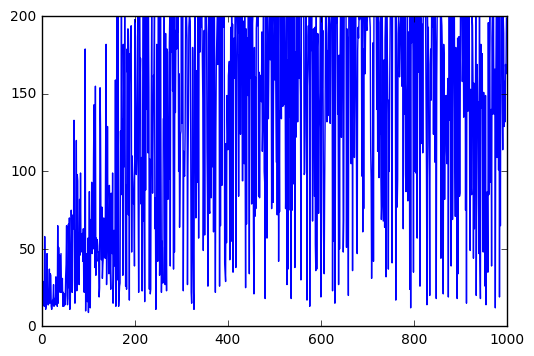

In [220]:
plt.plot(reward_list)

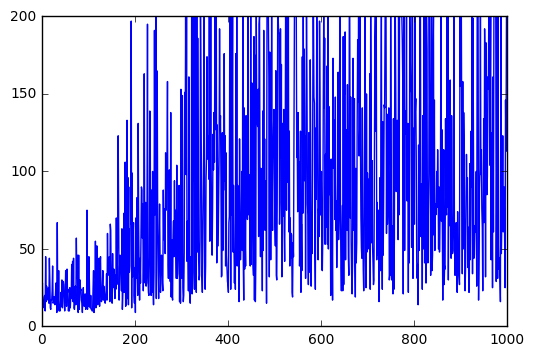

In [150]:
plt.plot(step_list)

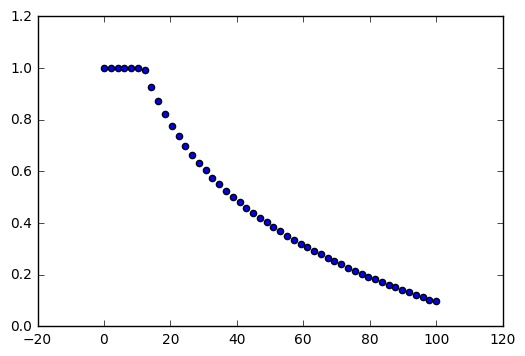

In [96]:
def get_explore_rate(t):
    return max(0.1, min(1, 1.0 - math.log10((2*t+1)/25)))

t = np.linspace(0,100)
y = [get_explore_rate(i) for i in t]
plt.scatter(t, y)

In [166]:
0..10

SyntaxError: invalid syntax (<ipython-input-166-13dfd8a4e362>, line 1)

In [171]:
(3/4 + 9/10)

1.65

In [173]:
(3/4 + 9/10)

12.000000000000002

In [180]:
np.linalg.solve([[2, 14, 14], [1, 0, 0], [1, 1, 0]], [675, 1, 2])

array([  1.        ,   1.        ,  47.07142857])

In [195]:
import numpy as np

count = -1

def f(i, j, k):
    global count
    count += 1
    return count-1

ind_lookup = np.fromfunction(np.vectorize(f), (2,2,2), dtype=int)
ind_lookup

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [198]:
ind_lookup[0, 0, 0]

0